In [37]:
res = {}
with open("./wyn.csv", "r") as f:
    for l in f.readlines():
        index, points = l.split(",")
        if points != "\n":
            points_sum = sum(int(x) for x in points.split(" "))
        else:
            points_sum = 0
        res[index] = points_sum
        
mean_all = sum(res.values())/len(res)

In [38]:
group3 = []
with open("./moja_grupa_bez_4_osob.txt", "r") as f:
    group3 = f.readlines()

In [46]:
group3 = [m.split("\n")[0] for m in group3]
group3_res = {k: v for k, v in res.items() if k in group3}

In [47]:
mean_group3 = sum(group3_res.values())/len(group3_res)

## Średnia w grupie 3 jest wyższa niż średnia całego roku

In [53]:
mean_all, mean_group3

(13.217391304347826, 14.692307692307692)

## Analiza rozkładu

In [55]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
np.random.seed(sum(map(ord, "distributions")))

In [69]:
dist_all = np.array(list(res.values()))
dist_grp3 = np.array(list(group3_res.values()))

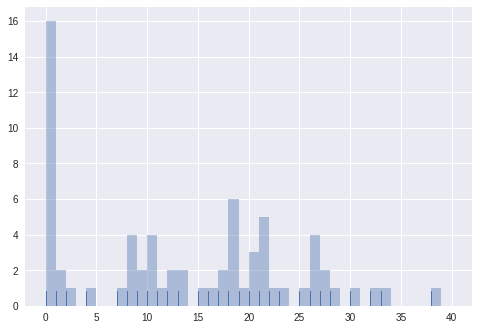

In [70]:
sns.distplot(dist_all, kde=False, rug=True, bins=list(range(41)))

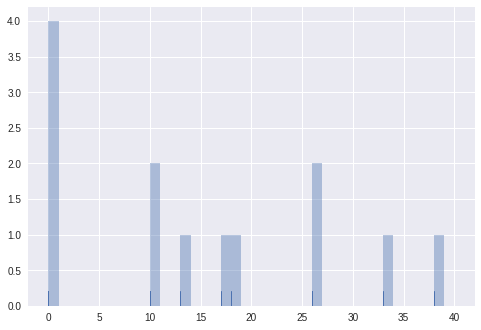

In [71]:
sns.distplot(dist_grp3, kde=False, rug=True, bins=list(range(41)))

### Patrząc na rozkład całego roku widać, że przypomina normalny, z wyłączeniem grupy ludzi, która uzyskała zero punktów.

In [72]:
zeros_percent_all = sum(1 for v in res.values() if v == 0)/len(res)
zeros_percent_grp3 = sum(1 for v in group3_res.values() if v == 0)/len(group3_res)

In [73]:
zeros_percent_all, zeros_percent_grp3

(0.2318840579710145, 0.3076923076923077)

### Procent ludzi w ogólnej populacji, którzy uzyskali zero, jest trochę niższy, niż w grupie 3 

### Usuwając zera, można dopasować rozkład normalny i sprawdzić, jak wygląda różnica między nimi

In [82]:
dist_all_nonzero = np.array(list(filter(lambda x: x != 0, res.values())))
dist_grp3_nonzero = np.array(list(filter(lambda x: x != 0, group3_res.values())))

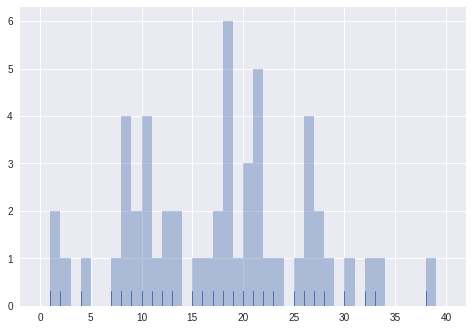

In [84]:
sns.distplot(dist_all_nonzero, kde=False, rug=True, bins=list(range(41)))

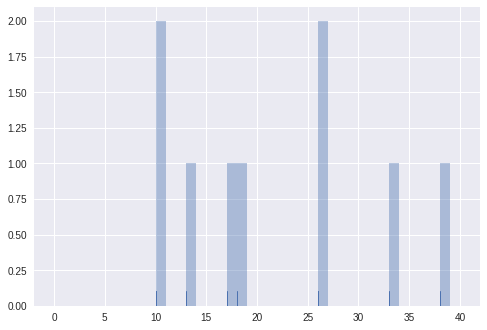

In [86]:
sns.distplot(dist_grp3_nonzero, kde=False, rug=True, bins=list(range(41)))

In [90]:
from scipy.stats import norm
mu_all, std_all = norm.fit(dist_all_nonzero)
mu_grp3, std_grp3 = norm.fit(dist_grp3_nonzero)

mu_all, mu_grp3, std_all, std_grp3

(17.20754716981132, 21.222222222222221, 8.4146289743563205, 9.507631762347291)